# Import the necessary libraries

In [1]:
import pandas as pd
import sys
import os
import matplotlib.pyplot as plt
import seaborn as sns
import logging
 
# Configure logging
logging.basicConfig(filename='../logs/data_processing.log',
                    level=logging.INFO,
                    format='%(asctime)s:%(levelname)s:%(message)s')
  


sys.path.append(os.path.abspath(os.path.join(os.getcwd(), '../scripts')))
from load_data import Load_Data
from data_cleaning import clean_data

# Load data

### Load train data

In [2]:

# Create an instance of CSVReader
train_df = Load_Data('../data/train.csv')

# Load the data
train_df.load_data()

# Get the loaded data
train_df = train_df.get_data()

logging.info("Load train data")


c:\Users\wubeshet.abera\Projects\Ten-Academy\Sales-Prediction-Model\scripts\load_data.py:12: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  self.data = pd.read_csv(self.file_path)


Data successfully loaded from ../data/train.csv


### Load test data

In [3]:
# Create an instance of CSVReader
test_df = Load_Data('../data/test.csv')

# Load the data
test_df.load_data()

# Get the loaded data
test_df = test_df.get_data()

logging.info("Load test data")


Data successfully loaded from ../data/test.csv


### Load store data

In [4]:
# Create an instance of CSVReader
store_df = Load_Data('../data/store.csv')

# Load the data
store_df.load_data()

# Get the loaded data
store_df = store_df.get_data()

logging.info("Load store data")



Data successfully loaded from ../data/store.csv


# Data cleaning

In [5]:
cleaned_df_test = clean_data(test_df)
cleaned_df_train = clean_data(test_df)
cleaned_df_store = clean_data(store_df)

logging.info('The first 5 rows')
logging.info(cleaned_df_train.head())


# Check the value distribution of 'promotion' in both datasets

Promotion Distribution in Training Set:
Promo
0.0    0.604167
1.0    0.395833
Name: proportion, dtype: float64

Promotion Distribution in Test Set:
Promo
0.0    0.604167
1.0    0.395833
Name: proportion, dtype: float64

Promotion Distribution in store Set:
Promo2
1.0    0.522099
0.0    0.477901
Name: proportion, dtype: float64


C:\Users\wubeshet.abera\AppData\Local\Temp\ipykernel_21648\3638184856.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=train_promotion_dist.index, y=train_promotion_dist.values, palette='Blues')
C:\Users\wubeshet.abera\AppData\Local\Temp\ipykernel_21648\3638184856.py:30: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=test_promotion_dist.index, y=test_promotion_dist.values, palette='Greens')
C:\Users\wubeshet.abera\AppData\Local\Temp\ipykernel_21648\3638184856.py:36: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=store_promotion_dist.

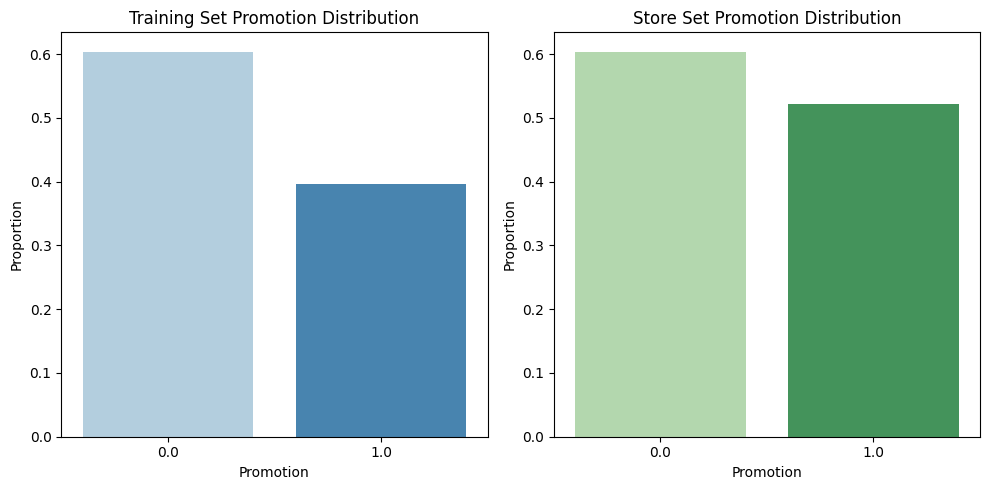

In [6]:
logging.info('Check the value distribution of promotion in both datasets ')


train_promotion_dist = cleaned_df_train['Promo'].value_counts(normalize=True)
test_promotion_dist = cleaned_df_test['Promo'].value_counts(normalize=True)
store_promotion_dist = cleaned_df_store['Promo2'].value_counts(normalize=True)

print("Promotion Distribution in Training Set:")
print(train_promotion_dist)
logging.info(train_promotion_dist)
print("\nPromotion Distribution in Test Set:")
print(test_promotion_dist)
logging.info(test_promotion_dist)

print("\nPromotion Distribution in store Set:")
print(store_promotion_dist)
logging.info(store_promotion_dist)
plt.figure(figsize=(10, 5))


# Training set distribution
plt.subplot(1, 2, 1)
sns.barplot(x=train_promotion_dist.index, y=train_promotion_dist.values, palette='Blues')
plt.title('Training Set Promotion Distribution')
plt.xlabel('Promotion')
plt.ylabel('Proportion')

# Test set distribution
plt.subplot(1, 2, 2)
sns.barplot(x=test_promotion_dist.index, y=test_promotion_dist.values, palette='Greens')
plt.title('Test Set Promotion Distribution')
plt.xlabel('Promotion')
plt.ylabel('Proportion')
# store set distribution
plt.subplot(1, 2, 2)
sns.barplot(x=store_promotion_dist.index, y=store_promotion_dist.values, palette='Greens')
plt.title('Store Set Promotion Distribution')
plt.xlabel('Promotion')
plt.ylabel('Proportion')

plt.tight_layout()
plt.show()

# Check & compare sales behavior before, during, and after holidays


   Store  DayOfWeek       Date  Sales  Customers  Open  Promo StateHoliday  \
0      1          5 2015-07-31   5263        555     1      1            0   
1      2          5 2015-07-31   6064        625     1      1            0   
2      3          5 2015-07-31   8314        821     1      1            0   
3      4          5 2015-07-31  13995       1498     1      1            0   
4      5          5 2015-07-31   4822        559     1      1            0   

   SchoolHoliday holiday_category  
0              1   During Holiday  
1              1   During Holiday  
2              1   During Holiday  
3              1   During Holiday  
4              1   During Holiday  


C:\Users\wubeshet.abera\AppData\Local\Temp\ipykernel_21648\4135503230.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='holiday_category', y='Sales', data=train_df, palette='Set2')  # Replace 'Sales' with your actual sales column name


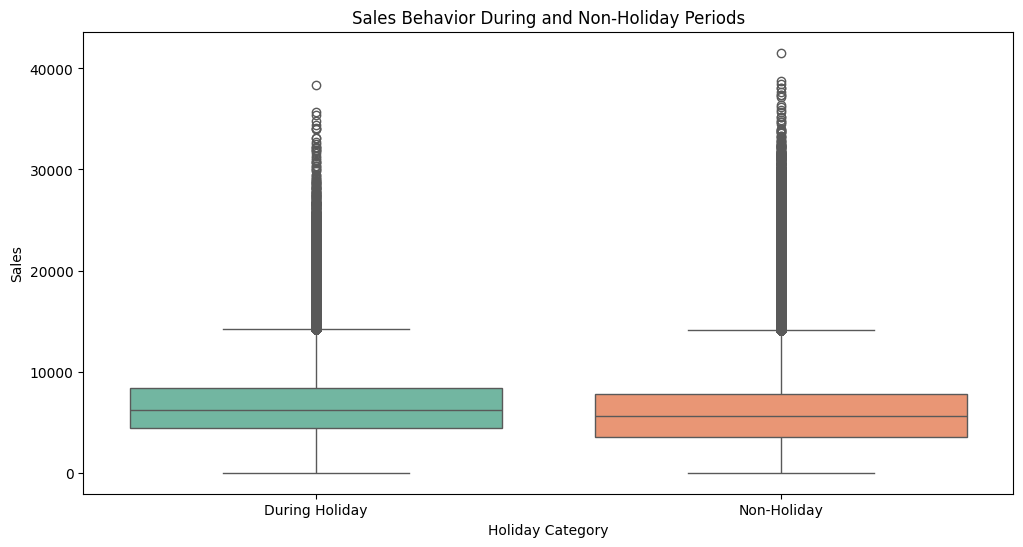

Summary Statistics by Holiday Category:
                     count         mean          std  min     25%     50%  \
holiday_category                                                            
During Holiday    181721.0  6476.522207  3709.677337  0.0  4447.0  6197.0   
Non-Holiday       835488.0  5620.979034  3862.873159  0.0  3506.0  5642.0   

                     75%      max  
holiday_category                   
During Holiday    8343.0  38367.0  
Non-Holiday       7749.0  41551.0  


In [7]:
logging.info('Check & compare sales behavior before, during, and after holidays')

# Convert Date column to datetime
train_df['Date'] = pd.to_datetime(train_df['Date'], format='%Y-%m-%d')

# Function to categorize dates based on holidays
def categorize_holidays(row):
    if row['SchoolHoliday'] == 1 or row['StateHoliday'] == 1:
        return 'During Holiday'
    return 'Non-Holiday'

# Apply the categorization function
train_df['holiday_category'] = train_df.apply(categorize_holidays, axis=1)

print(train_df.head())


# Compare sales behavior
plt.figure(figsize=(12, 6))
sns.boxplot(x='holiday_category', y='Sales', data=train_df, palette='Set2')  # Replace 'Sales' with your actual sales column name
plt.title('Sales Behavior During and Non-Holiday Periods')
plt.xlabel('Holiday Category')
plt.ylabel('Sales')
plt.show()

# Optional: Summary statistics
print("Summary Statistics by Holiday Category:")
print(train_df.groupby('holiday_category')['Sales'].describe())  # Replace 'Sales' with your actual sales column name
logging.info(train_df.groupby('holiday_category')['Sales'].describe())  # Replace 'Sales' with your actual sales column name

# Find out any seasonal (Christmas, Easter, etc) purchase behaviors


C:\Users\wubeshet.abera\AppData\Local\Temp\ipykernel_21648\1292432398.py:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='holiday_category', y='Sales', data=train_df, palette='Set2')  # Replace 'Sales' with the actual sales column


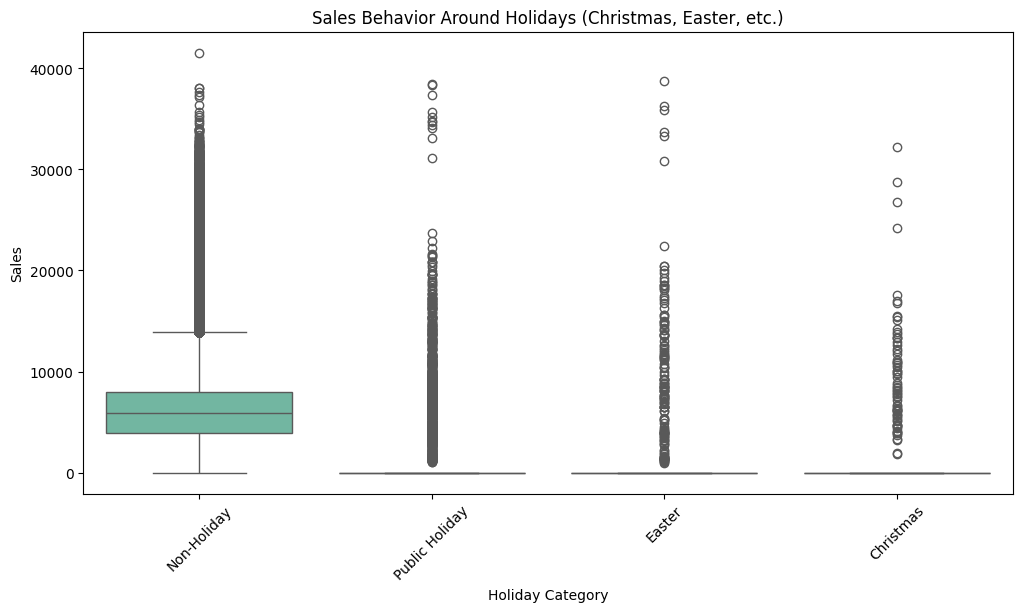

Summary Statistics by Holiday Category:
                     count         mean          std  min     25%     50%  \
holiday_category                                                            
Christmas           4100.0   168.733171  1492.274865  0.0     0.0     0.0   
Easter              6690.0   214.311510  1816.918138  0.0     0.0     0.0   
Non-Holiday       986159.0  5947.483893  3767.890619  0.0  3967.0  5849.0   
Public Holiday     20260.0   290.735686  1870.281698  0.0     0.0     0.0   

                     75%      max  
holiday_category                   
Christmas            0.0  32169.0  
Easter               0.0  38722.0  
Non-Holiday       7936.0  41551.0  
Public Holiday       0.0  38484.0  


In [8]:
logging.info("Find out any seasonal (Christmas, Easter, etc) purchase behavior")

# Convert the 'Date' column to datetime
train_df['Date'] = pd.to_datetime(train_df['Date'], format='%Y-%m-%d')

# Create a function to categorize the holidays based on the 'StateHoliday' column
def categorize_holiday(row):
    state_holiday = row['StateHoliday']
    
    # Categorize based on the 'StateHoliday' column
    if state_holiday == 'a':
        return 'Public Holiday'
    elif state_holiday == 'b':
        return 'Easter'
    elif state_holiday == 'c':
        return 'Christmas'
    else:
        return 'Non-Holiday'

# Apply the function to create a 'holiday_category' column
train_df['holiday_category'] = train_df.apply(categorize_holiday, axis=1)

# Visualize how sales behave around holidays
plt.figure(figsize=(12, 6))
sns.boxplot(x='holiday_category', y='Sales', data=train_df, palette='Set2')  # Replace 'Sales' with the actual sales column
plt.title('Sales Behavior Around Holidays (Christmas, Easter, etc.)')
plt.xlabel('Holiday Category')
plt.ylabel('Sales')
plt.xticks(rotation=45)
plt.show()

# Optional: Get summary statistics of sales by holiday category
print("Summary Statistics by Holiday Category:")
summary_stats = train_df.groupby('holiday_category')['Sales'].describe()  # Replace 'Sales' with your actual sales column name
print(summary_stats)
logging.info(summary_stats)

# Correlation between sales and number of customers

Correlation between Sales and Customers: 0.8947107733017018


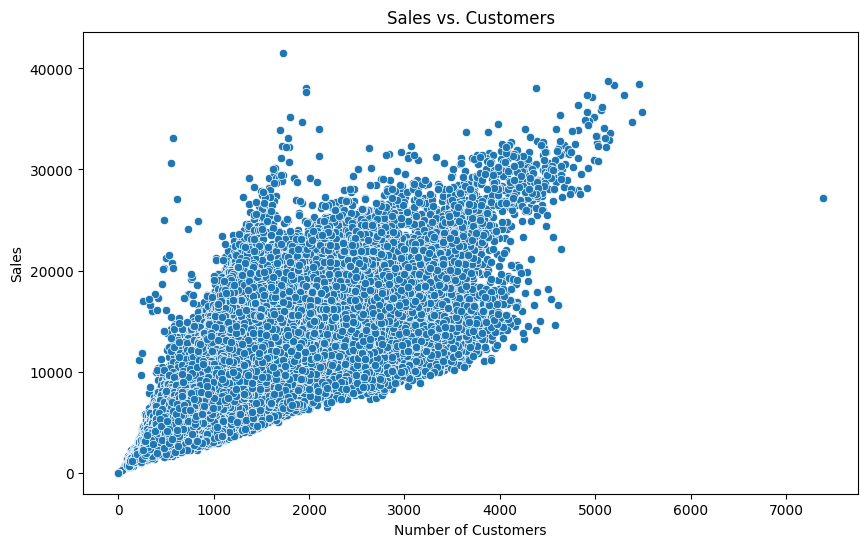

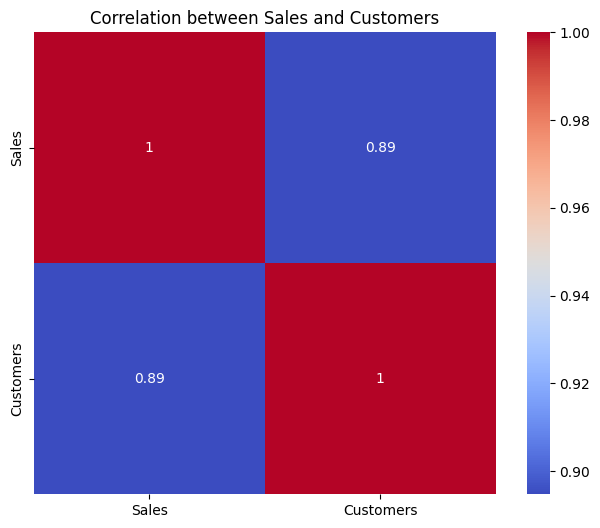

In [9]:

logging.info("Correlation between sales and number of customers")

# Drop rows with missing values in Sales or Customers
train_df = train_df.dropna(subset=['Sales', 'Customers'])

# Calculate the Pearson correlation coefficient between Sales and Customers
correlation = train_df['Sales'].corr(train_df['Customers'])
print(f'Correlation between Sales and Customers: {correlation}')

# Visualize the relationship between Sales and Customers
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Customers', y='Sales', data=train_df)
plt.title('Sales vs. Customers')
plt.xlabel('Number of Customers')
plt.ylabel('Sales')
plt.show()

# Create a heatmap to visualize the correlation
plt.figure(figsize=(8, 6))
sns.heatmap(train_df[['Sales', 'Customers']].corr(), annot=True, cmap='coolwarm', square=True)
plt.title('Correlation between Sales and Customers')
plt.show()

# How does promo affect sales? Are the promos attracting more customers? How does it affect already existing customers?

Sales        0
Customers    0
Promo        0
dtype: int64
   Promo    avg_sales  avg_customers    sales_std  customers_std  sales_min  \
0      0  4406.050805     517.823542  3442.450020     452.881419          0   
1      1  7991.152046     820.098815  3419.025495     419.897191          0   

   sales_max  customers_min  customers_max  
0      41551              0           5387  
1      38722              0           7388  


C:\Users\wubeshet.abera\AppData\Local\Temp\ipykernel_1256\2742386520.py:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Promo', y='Sales', data=train_df, palette='Set2')
C:\Users\wubeshet.abera\AppData\Local\Temp\ipykernel_1256\2742386520.py:35: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Promo', y='Customers', data=train_df, palette='Set3')


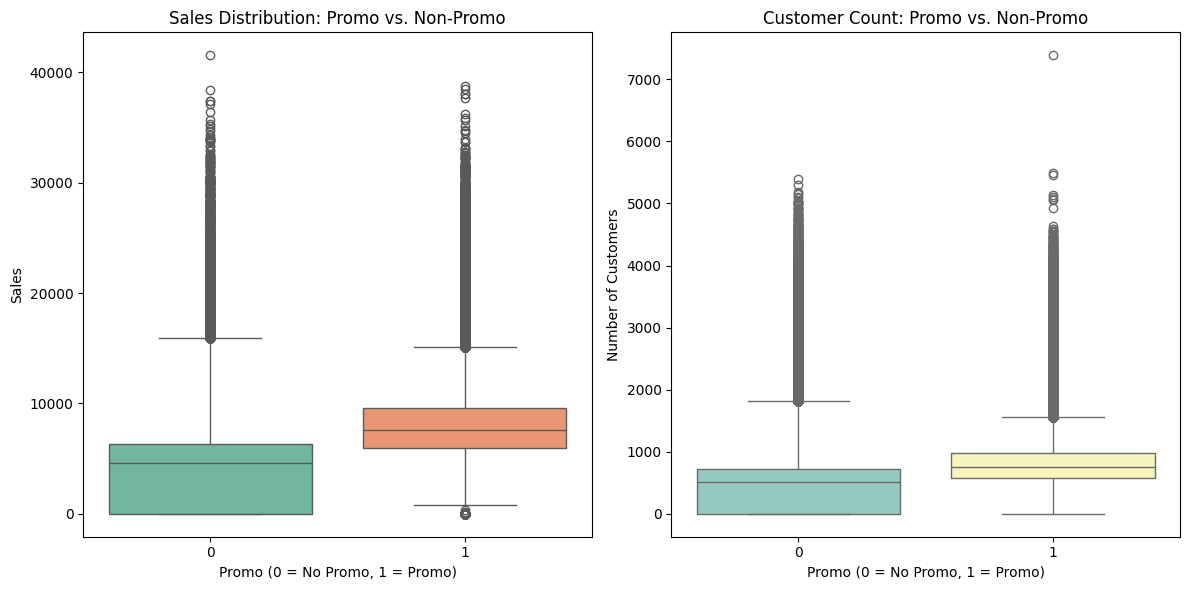

In [12]:
logging.info('How does promo affect sales? Are the promos attracting more customers? How does it affect already existing customers?')

# Check for missing values in Sales, Customers, and Promo
print(train_df[['Sales', 'Customers', 'Promo']].isnull().sum())

# Drop rows with missing values in Sales, Customers, or Promo
df_train = train_df.dropna(subset=['Sales', 'Customers', 'Promo'])

# Group data by Promo to compare Sales and Customers during promotions vs. non-promotions
promo_grouped = df_train.groupby('Promo').agg(
    avg_sales=('Sales', 'mean'),
    avg_customers=('Customers', 'mean'),
    sales_std=('Sales', 'std'),
    customers_std=('Customers', 'std'),
    sales_min=('Sales', 'min'),
    sales_max=('Sales', 'max'),
    customers_min=('Customers', 'min'),
    customers_max=('Customers', 'max')
).reset_index()

print(promo_grouped)
logging.info(promo_grouped)
# Visualize Sales during Promo vs. Non-Promo periods
plt.figure(figsize=(12, 6))

# Sales comparison
plt.subplot(1, 2, 1)
sns.boxplot(x='Promo', y='Sales', data=train_df, palette='Set2')
plt.title('Sales Distribution: Promo vs. Non-Promo')
plt.xlabel('Promo (0 = No Promo, 1 = Promo)')
plt.ylabel('Sales')

# Customers comparison
plt.subplot(1, 2, 2)
sns.boxplot(x='Promo', y='Customers', data=train_df, palette='Set3')
plt.title('Customer Count: Promo vs. Non-Promo')
plt.xlabel('Promo (0 = No Promo, 1 = Promo)')
plt.ylabel('Number of Customers')

plt.tight_layout()
plt.show()


# Could the promos be deployed in more effective ways? Which stores should promos be deployed in?

   Store  Promo    avg_sales  avg_customers    sales_std  customers_std  \
0      1      0  3198.994845     399.682131  2052.472060     250.880900   
1      1      1  5152.886111     577.522222  1209.962568     126.158363   
2      2      0  2855.058419     366.876289  1893.487434     246.250761   
3      2      1  6172.816667     678.702778  1421.844953     138.557644   
4      3      0  3967.596220     477.445017  2600.060547     310.339384   

   sales_min  sales_max  customers_min  customers_max  
0          0       9528              0           1130  
1          0       8414              0            902  
2          0       9027              0           1164  
3          0      10682              0           1133  
4          0      14461              0           1579  


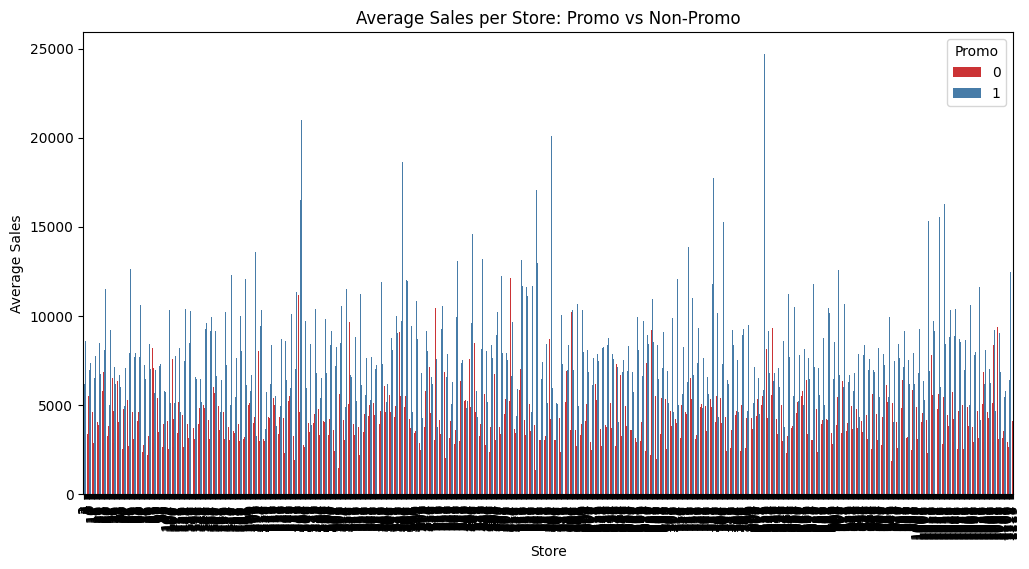

C:\Users\wubeshet.abera\AppData\Local\Temp\ipykernel_1256\704576861.py:33: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Store', y='Sales_Diff', data=store_sales_diff, palette='coolwarm')


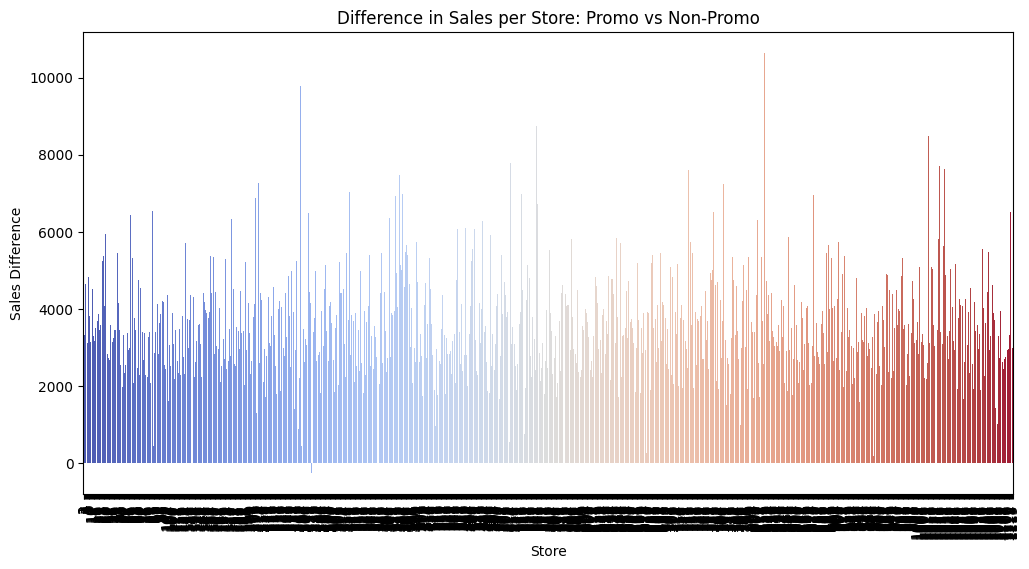

Stores where promotions have a strong impact on sales:
Promo  Store   Sales_Diff
0          1  1953.891266
1          2  3317.758247
2          3  4641.070447
3          4  3801.571249
4          5  3361.995189
...      ...          ...
1110    1111  3321.806472
1111    1112  6514.826088
1112    1113  2919.723568
1113    1114  7123.754954
1114    1115  2991.045017

[1114 rows x 2 columns]


In [13]:
logging.info('Could the promos be deployed in more effective ways? Which stores should promos be deployed in?')

# Group data by Store and Promo to compare Sales and Customers during promo vs non-promo periods
store_promo_grouped = train_df.groupby(['Store', 'Promo']).agg(
    avg_sales=('Sales', 'mean'),
    avg_customers=('Customers', 'mean'),
    sales_std=('Sales', 'std'),
    customers_std=('Customers', 'std'),
    sales_min=('Sales', 'min'),
    sales_max=('Sales', 'max'),
    customers_min=('Customers', 'min'),
    customers_max=('Customers', 'max')
).reset_index()

print(store_promo_grouped.head())  # Display the first few rows of the result

# Visualize the difference in average sales across stores during promotions and non-promo periods
plt.figure(figsize=(12, 6))
sns.barplot(x='Store', y='avg_sales', hue='Promo', data=store_promo_grouped, palette='Set1')
plt.title('Average Sales per Store: Promo vs Non-Promo')
plt.xlabel('Store')
plt.ylabel('Average Sales')
plt.xticks(rotation=90)
plt.show()


# Calculate the difference in average sales between promo and non-promo periods per store
store_sales_diff = store_promo_grouped.pivot(index='Store', columns='Promo', values='avg_sales').reset_index()
store_sales_diff['Sales_Diff'] = store_sales_diff[1] - store_sales_diff[0]

# Plot the difference in sales per store
plt.figure(figsize=(12, 6))
sns.barplot(x='Store', y='Sales_Diff', data=store_sales_diff, palette='coolwarm')
plt.title('Difference in Sales per Store: Promo vs Non-Promo')
plt.xlabel('Store')
plt.ylabel('Sales Difference')
plt.xticks(rotation=90)
plt.show()

# Identify stores where promotions have a positive impact
high_impact_stores = store_sales_diff[store_sales_diff['Sales_Diff'] > 0]
print("Stores where promotions have a strong impact on sales:")
print(high_impact_stores[['Store', 'Sales_Diff']])
logging.info(high_impact_stores[['Store', 'Sales_Diff']])

# Trends of customer behavior during store opening and closing times


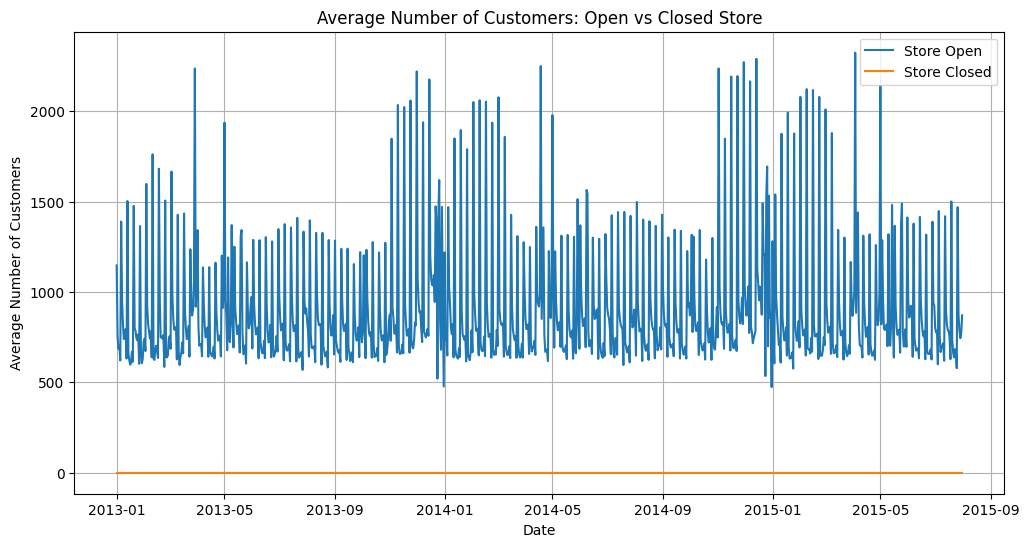

In [14]:
logging.info('Trends of customer behavior during store opening and closing times')

# Filter for when the store is open and closed
df_open = train_df[df_train['Open'] == 1]  # Store is open
df_closed = train_df[df_train['Open'] == 0]  # Store is closed

# Group by date to calculate daily customer and sales behavior
open_grouped = df_open.groupby('Date').agg(
    avg_customers=('Customers', 'mean'),
    total_sales=('Sales', 'sum')
).reset_index()

closed_grouped = df_closed.groupby('Date').agg(
    avg_customers=('Customers', 'mean'),
    total_sales=('Sales', 'sum')
).reset_index()



# Plot average customers when store is open vs closed
plt.figure(figsize=(12, 6))
sns.lineplot(data=open_grouped, x='Date', y='avg_customers', label='Store Open')
sns.lineplot(data=closed_grouped, x='Date', y='avg_customers', label='Store Closed')
plt.title('Average Number of Customers: Open vs Closed Store')
plt.xlabel('Date')
plt.ylabel('Average Number of Customers')
plt.legend()
plt.grid(True)
plt.show()





# Which stores are open on all weekdays? How does that affect their sales on weekends? 

In [15]:
logging.info("Which stores are open on all weekdays? How does that affect their sales on weekends?")

# Filter for weekdays (1-5)
weekday_open = df_train[df_train['DayOfWeek'].isin([1, 2, 3, 4, 5])]

# Check which stores are open on all weekdays
stores_open_all_weekdays = weekday_open.groupby('Store')['Open'].agg(lambda x: (x == 1).all()).reset_index()

# Filter for stores that are open all weekdays
stores_open_all_weekdays = stores_open_all_weekdays[stores_open_all_weekdays['Open'] == True]['Store'].unique()


# Filter for weekend data (6 and 7)
weekend_data = df_train[df_train['DayOfWeek'].isin([6, 7])]

# Further filter for stores that are open all weekdays
weekend_open_stores = weekend_data[weekend_data['Store'].isin(stores_open_all_weekdays)]

# Group by store to analyze total sales on weekends
weekend_sales_analysis = weekend_open_stores.groupby('Store').agg(
    total_sales=('Sales', 'sum'),
    avg_customers=('Customers', 'mean')
).reset_index()

# Display the results
print(weekend_sales_analysis)
logging.info(weekend_sales_analysis)


   Store  total_sales  avg_customers
0     85      2261744    1178.037313
1    262      6162493    3789.623134
2    335      2266506    1605.742537
3    423      2963899    1911.630597
4    494      1781482     978.141791
5    562      4406268    2933.664179
6    682      2035533    1328.992537
7    733      3907309    3277.361940
8    769      2802093    2891.235075
9   1097      2573336    2258.735075


In [15]:
unique_values = store_df['StoreType'].unique()
print("Unique values in StoreType:", unique_values)

Unique values in StoreType: ['c' 'a' 'd' 'b']


### Merge sales and date columns from train data into store data

In [17]:
store = store_df.merge(train_df[['Store', 'Sales', 'Date']], on='Store', how='left')


print(store)

          Store StoreType Assortment  CompetitionDistance  \
0           1.0         c          a               1270.0   
1           1.0         c          a               1270.0   
2           1.0         c          a               1270.0   
3           1.0         c          a               1270.0   
4           1.0         c          a               1270.0   
...         ...       ...        ...                  ...   
1017204  1115.0         d          c               5350.0   
1017205  1115.0         d          c               5350.0   
1017206  1115.0         d          c               5350.0   
1017207  1115.0         d          c               5350.0   
1017208  1115.0         d          c               5350.0   

         CompetitionOpenSinceMonth  CompetitionOpenSinceYear  Promo2  \
0                              9.0                    2008.0     0.0   
1                              9.0                    2008.0     0.0   
2                              9.0                 

# Check how the assortment type affects sales

  StoreType Assortment         Sales
0         a          a   5398.858310
1         a          c   6310.867032
2         b          a  10821.619806
3         b          b   8553.931999
4         b          c  17969.556263
5         c          a   5647.174314
6         c          c   5805.782193
7         d          a   5317.885943
8         d          c   5826.407660


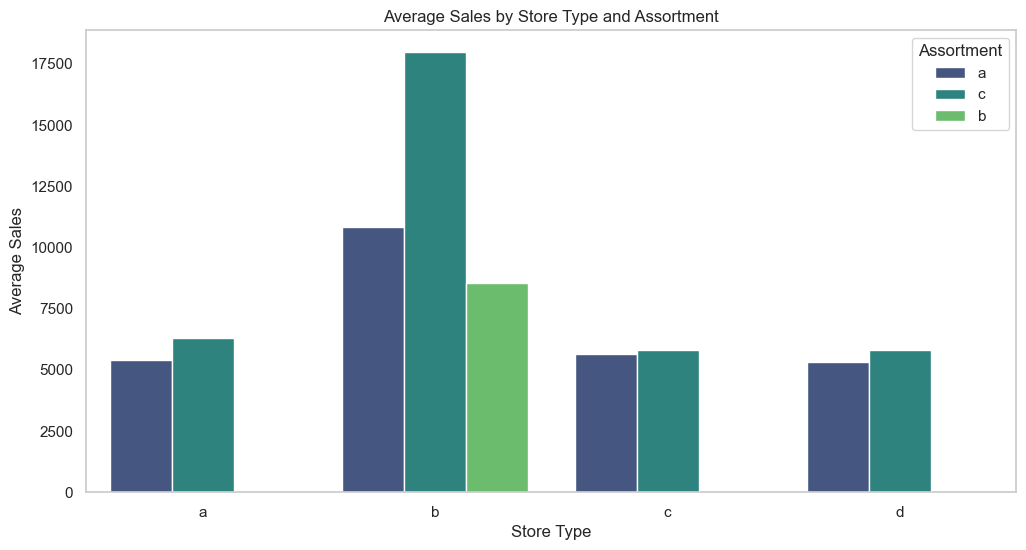

In [18]:
logging.info('Check how the assortment type affects sales')

# Group by StoreType and Assortment to calculate average sales
assortment_sales_analysis = store.groupby(['StoreType', 'Assortment'])['Sales'].mean().reset_index()

# Display the results
print(assortment_sales_analysis)
logging.info(assortment_sales_analysis)

sns.set(style="whitegrid")

# Create a bar plot
plt.figure(figsize=(12, 6))
sns.barplot(data=assortment_sales_analysis, x='StoreType', y='Sales', hue='Assortment', palette='viridis')
plt.title('Average Sales by Store Type and Assortment')
plt.xlabel('Store Type')
plt.ylabel('Average Sales')
plt.legend(title='Assortment')
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.show()

# How does the distance to the next competitor affect sales?


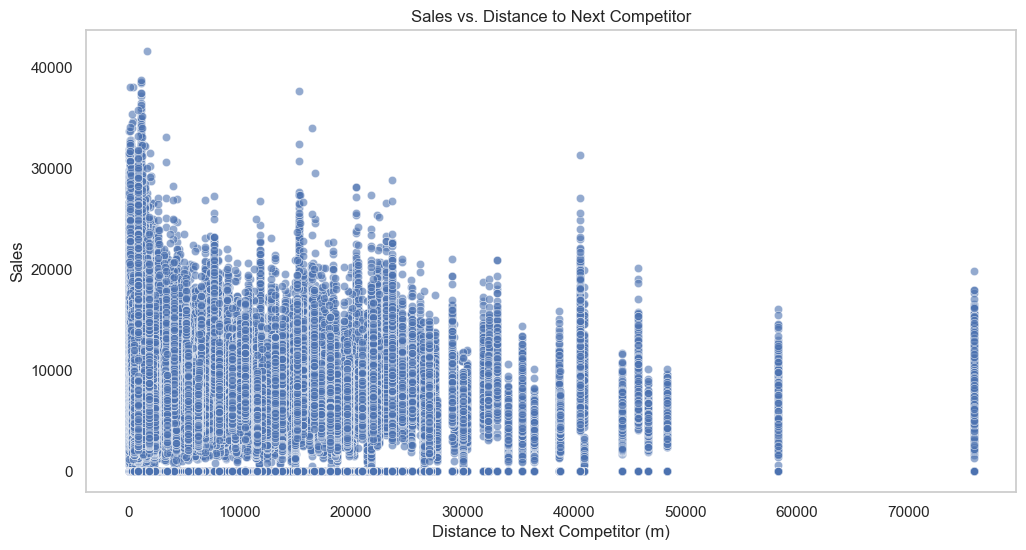

Correlation between Competition Distance and Sales: -0.02


In [19]:
logging.info(' How does the distance to the next competitor affect sales? What if the store and its competitors all happen to be in city centers, does the distance matter in that case?')

# Scatter plot of CompetitionDistance vs Sales
plt.figure(figsize=(12, 6))
sns.scatterplot(data=store, x='CompetitionDistance', y='Sales', alpha=0.6)
plt.title('Sales vs. Distance to Next Competitor')
plt.xlabel('Distance to Next Competitor (m)')
plt.ylabel('Sales')
plt.grid()
plt.show()


# Calculate correlation
correlation = store['CompetitionDistance'].corr(store['Sales'])
print(f"Correlation between Competition Distance and Sales: {correlation:.2f}")
logging.info(f"Correlation between Competition Distance and Sales: {correlation:.2f}")


# How does the opening or reopening of new competitors affect stores? 

  BeforeOrAfterCompetition        Sales
0    After Competitor Open  5755.586092
1   Before Competitor Open  5974.642737


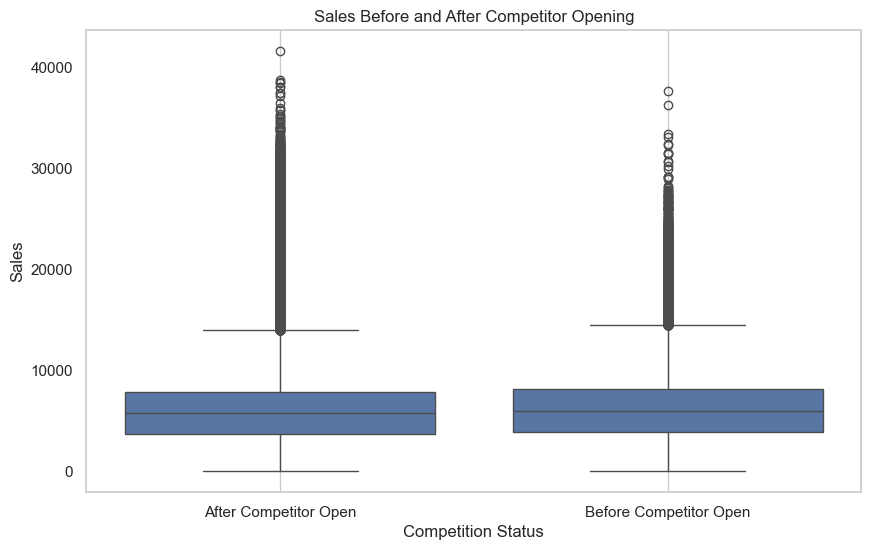

In [20]:
logging.info('# How does the opening or reopening of new competitors affect stores? ')

# Filter out rows with valid competition data
competitor_data = store[
    (store['CompetitionOpenSinceYear'].notna()) &
    (store['CompetitionOpenSinceMonth'].notna()) &
    (store['CompetitionDistance'].notna())
]

# Convert 'Date' column to datetime for further analysis
store['Date'] = pd.to_datetime(store['Date'])

# Extract competitor open date
competitor_data['CompetitionOpenDate'] = pd.to_datetime(
    dict(year=competitor_data['CompetitionOpenSinceYear'], 
         month=competitor_data['CompetitionOpenSinceMonth'], day=1)
)

# Calculate time difference between store sales date and competitor open date
competitor_data['DaysSinceCompetitionOpen'] = (competitor_data['Date'] - competitor_data['CompetitionOpenDate']).dt.days

# Classify sales as before or after competitor opening
competitor_data['BeforeOrAfterCompetition'] = competitor_data['DaysSinceCompetitionOpen'].apply(
    lambda x: 'Before Competitor Open' if x < 0 else 'After Competitor Open'
)



# Group by 'BeforeOrAfterCompetition' to get average sales
sales_before_after = competitor_data.groupby('BeforeOrAfterCompetition')['Sales'].mean().reset_index()

print(sales_before_after)
logging.info(sales_before_after)

# Plot sales before and after competitor opening
plt.figure(figsize=(10, 6))
sns.boxplot(data=competitor_data, x='BeforeOrAfterCompetition', y='Sales')
plt.title('Sales Before and After Competitor Opening')
plt.xlabel('Competition Status')
plt.ylabel('Sales')
plt.grid()
plt.show()

